In [1]:
!pip install yfinance

In [1]:
# import libary
import pandas as pd
import yfinance as yf
import mplfinance as mpf


In [2]:
start_date = '2021-01-01'

In [3]:
data = yf.download('BTC-USD', start=start_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...
2023-02-24,23946.007812,24103.705078,23007.072266,23198.126953,23198.126953,26811744928
2023-02-25,23200.125000,23210.210938,22861.558594,23175.375000,23175.375000,16100721565
2023-02-26,23174.150391,23654.367188,23084.220703,23561.212891,23561.212891,16644534842


In [5]:
def get_bollingerbands(df,period):
    df = data.copy()
    df['sma'] = data.Close.rolling(period).mean()
    df['upper'] =  data.Close.rolling(period).mean() + (2*data.Close.rolling(period).std())
    df['lower'] = data.Close.rolling(period).mean() - (2*data.Close.rolling(period).std())
    return df

In [6]:
df = get_bollingerbands(data, 20)

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,sma,upper,lower
Date,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-02-24,23946.007812,24103.705078,23007.072266,23198.126953,23198.126953,26811744928,23257.173730,25484.342389,21030.005072
2023-02-25,23200.125000,23210.210938,22861.558594,23175.375000,23175.375000,16100721565,23268.159180,25491.229680,21045.088679
2023-02-26,23174.150391,23654.367188,23084.220703,23561.212891,23561.212891,16644534842,23308.214355,25521.588972,21094.839739


In [8]:
addplot_data = mpf.make_addplot(df[['upper','lower','sma']])

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


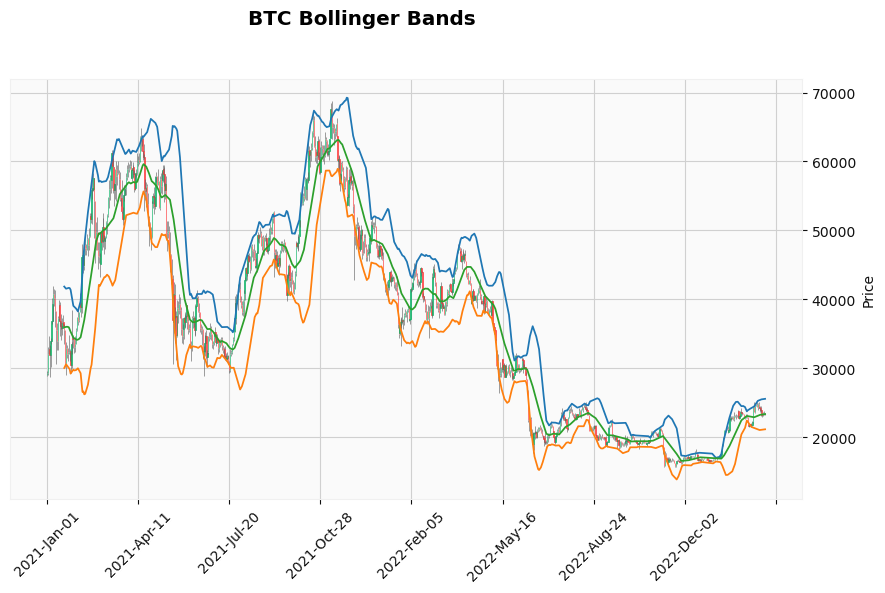

In [9]:
mpf.plot(df,type='candle',style='yahoo',addplot=addplot_data,title = 'BTC Bollinger Bands',figsize=(11,6))

In [10]:
# create bollinger bands with expotential moving avergrage

In [11]:
def get_expotential_bollinger_bands(data,period):
    df2 = data.copy()
    df2['ema'] = data.Close.ewm(span=period, adjust=False, min_periods=period).mean()
    df2['upper'] = data.Close.ewm(span=period,adjust= False,min_periods = period).mean() + (2*data.Close.ewm(span=period,adjust = False,min_periods = period).std())
    df2['lower'] = data.Close.ewm(span=period,adjust = False,min_periods = period).mean() - (2*data.Close.ewm(span=period,adjust = False,min_periods = period).std())
    return df2


In [12]:
df2 = get_expotential_bollinger_bands(data,20)

In [13]:
addplot_data2 = mpf.make_addplot(df2[['upper','lower','ema']])

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


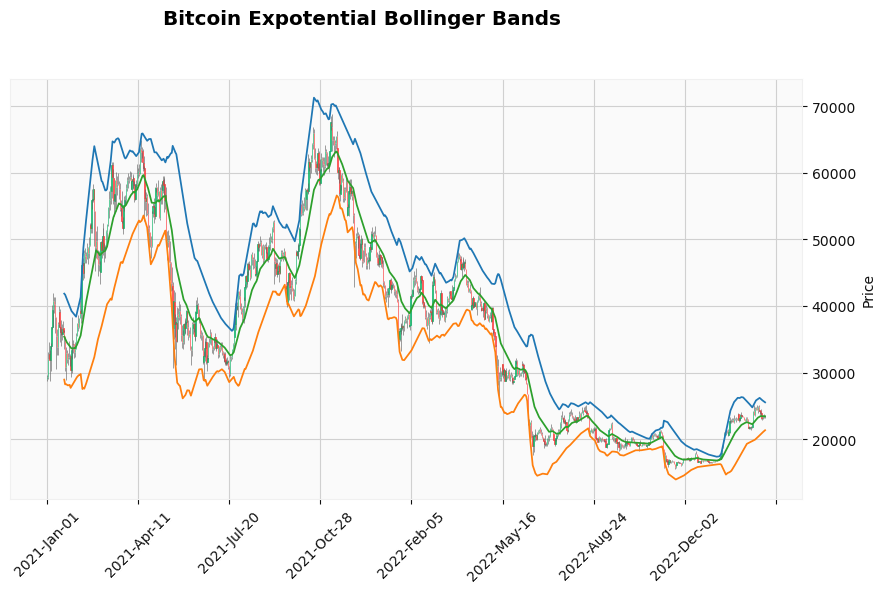

In [14]:
mpf.plot(df2,type='candle',style='yahoo',addplot=addplot_data2, title='Bitcoin Expotential Bollinger Bands', figsize=(11,6))